In [1]:
from   sklearn.svm             import SVR
from   sklearn.model_selection import GridSearchCV
from   sklearn.model_selection import cross_val_score
from   sklearn                 import metrics
from   sklearn                 import tree
import pandas                  as     pd
import numpy                   as     np
import seaborn                 as     sns
import matplotlib.pyplot       as     plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
olympics_all = pd.read_csv(r'C:\Users\USER\Desktop\DS_python\CP4\CP4\OlympicsData\olympics_all.csv')

In [3]:
X=olympics_all.drop(['NOC', 'country','Gold','Silver','Bronze', 'Medals','GDP_Per_Capita'],axis=1)
y=olympics_all[['Year','Gold','Silver','Bronze', 'Medals']]
print(X.shape)
print(y.shape)

(544, 10)
(544, 5)


In [4]:
#Splitting data 

X_trn = X[X['Year']<2016]
X_tst = X[X['Year'] == 2016]

y_trn = y[y['Year'] < 2016]
y_tst =  y[y['Year'] == 2016]

X_train = X_trn.drop(['Year'],axis=1)
X_test  = X_tst.drop(['Year'],axis=1)
print(X_train.shape)
print(X_test.shape)

y_train = y_trn
y_test =  y_tst
print(y_train.shape)
print(y_test.shape)

(460, 9)
(84, 9)
(460, 5)
(84, 5)


In [5]:
# Create linear regression objects
svm_gold   = SVR()
svm_silver = SVR()
svm_bronze = SVR()

# Train the models using the training sets
svm_gold.  fit(  X_train, y_train['Gold'])
svm_silver.fit(X_train, y_train['Silver'])
svm_bronze.fit(X_train, y_train['Bronze'])

SVR()

In [6]:
#Testing the model

y_pred_Gold   = svm_gold.predict(X_test)
y_pred_Gold   = y_pred_Gold.astype('int64')
y_pred_Gold   = y_pred_Gold.clip(min=0)

y_pred_Silver   = svm_silver.predict(X_test)
y_pred_Silver   = y_pred_Silver.astype('int64')
y_pred_Silver   = y_pred_Silver.clip(min=0)


y_pred_Bronze   = svm_bronze.predict(X_test)
y_pred_Bronze   = y_pred_Bronze.astype('int64')
y_pred_Bronze   = y_pred_Bronze.clip(min=0)

In [7]:
#Applying k-fold cross_validation

accuracy_gold = cross_val_score(estimator=svm_gold,X=X_train,y=y_train['Gold'],cv=3)
accuracy_silver = cross_val_score(estimator=svm_silver,X=X_train,y=y_train['Silver'],cv=3)
accuracy_bronze = cross_val_score(estimator=svm_bronze,X=X_train,y=y_train['Bronze'],cv=3)

print("Gold Accuracy:", accuracy_gold)
print()
print("Silver Accuracy:",accuracy_silver)
print()
print("Bronze Accuracy:",accuracy_bronze)

print()
print("Accuracy_gold  :", (accuracy_gold.mean()*100).round(3), ' and Std Dev:',accuracy_gold.std().round(2))
print("Accuracy_silver:", (accuracy_silver.mean()*100).round(3), ' and Std Dev:',accuracy_silver.std().round(2))
print("Accuracy_bronze:", (accuracy_bronze.mean()*100).round(3), ' and Std Dev:',accuracy_bronze.std().round(2))
print()

Gold Accuracy: [0.11943662 0.19307488 0.33029704]

Silver Accuracy: [0.18380825 0.2538868  0.42230734]

Bronze Accuracy: [0.26236567 0.28167873 0.44801116]

Accuracy_gold  : 21.427  and Std Dev: 0.09
Accuracy_silver: 28.667  and Std Dev: 0.1
Accuracy_bronze: 33.069  and Std Dev: 0.08



In [8]:
data = pd.read_csv(r'C:\Users\USER\Desktop\DS_python\CP4\CP4\OlympicsData\07_tokyo2020.csv')
data

,NOC,country,Population,GDP,Home_Field,Athletes,Athletes_w,Sports,Sports_w,Events,Events_w
0,AFG,Afghanistan,38041754,19101353833,0,5,1,3,1,5,1
1,ALG,Algeria,43053054,169988236398,0,52,1,12,1,40,1
2,ARG,Argentina,44938712,449663446954,0,161,30,22,4,72,4
3,ARM,Armenia,2957731,13672802158,0,26,4,8,2,28,4
4,AUS,Australia,25364307,1392680589329,0,419,98,30,12,207,36
...,...,...,...,...,...,...,...,...,...,...,...
102,USA,USA,328239523,22675000000000,0,557,225,32,21,249,96
103,UZB,Uzbekistan,33580650,57921286440,0,59,7,14,3,62,7
104,VEN,Venezuela,28515829,482359318768,0,87,1,18,1,76,1
105,VIE,Vietnam,96462106,261921244843,0,17,1,9,1,21,1


In [9]:
#Prediction

tokyo = data[['Population','GDP','Home_Field','Athletes','Athletes_w','Sports','Sports_w','Events','Events_w']]

PGold   = svm_gold.predict(tokyo)
PGold   = PGold.astype('int64')
PGold   = PGold.clip(min=0)
                                      
PSilver  = svm_silver.predict(tokyo)
PSilver  = PSilver.astype('int64')
PSilver  = PSilver.clip(min=0)
                                    
PBronze  = svm_bronze.predict(tokyo)
PBronze  = PSilver.astype('int64')
PBronze  = PSilver.clip(min=0)

In [10]:
#tokyo = pd.read_csv(r"C:\Users\USER\Desktop\DS_python\CP4\CP4\07_tokyo2020.csv")

#select only wanted columns
tokyo2020_prediction = data[['NOC','country']]


tokyo2020_prediction['PGold']   = PGold.T
tokyo2020_prediction['PSilver'] = PSilver.T
tokyo2020_prediction['PBronze'] = PBronze.T

tokyo2020_prediction['Total']  =  tokyo2020_prediction['PGold'] + tokyo2020_prediction['PSilver'] + tokyo2020_prediction['PBronze']
tokyo2020_predicted = tokyo2020_prediction.sort_values(by = 'Total', ascending = False)

tokyo2020_predicted.index = np.arange(1, len(tokyo2020_predicted)+1)
tokyo2020_predicted.head(20)

,NOC,country,PGold,PSilver,PBronze,Total
1,FRA,France,11,12,12,35
2,IND,India,10,12,12,34
3,GBR,UK,11,11,11,33
4,CHN,China,10,11,11,32
5,KOR,South Korea,9,11,11,31
6,ITA,Italy,9,11,11,31
7,GER,Germany,10,10,10,30
8,BRA,Brazil,8,10,10,28
9,USA,USA,9,9,9,27
10,JPN,Japan,9,9,9,27


<function matplotlib.pyplot.show(close=None, block=None)>

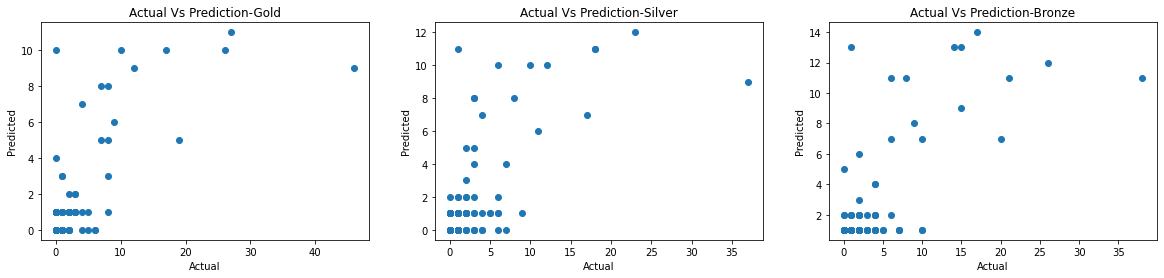

In [11]:
#Test set - Actual vs Prediction

plt.figure(figsize =(20,4))
plt.subplot(1,3,1)
plt.scatter(y_test['Gold'],y_pred_Gold)
plt.title("Actual Vs Prediction-Gold")
plt.xlabel("Actual")
plt.ylabel("Predicted")


plt.subplot(1,3,2)
plt.scatter(y_test['Silver'],y_pred_Silver)
plt.title("Actual Vs Prediction-Silver")
plt.xlabel("Actual")
plt.ylabel("Predicted")


plt.subplot(1,3,3)
plt.scatter(y_test['Bronze'],y_pred_Bronze)
plt.title("Actual Vs Prediction-Bronze")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show

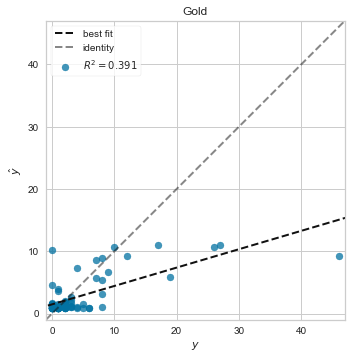

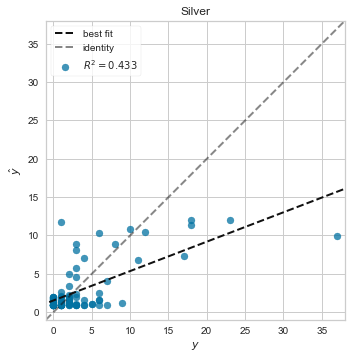

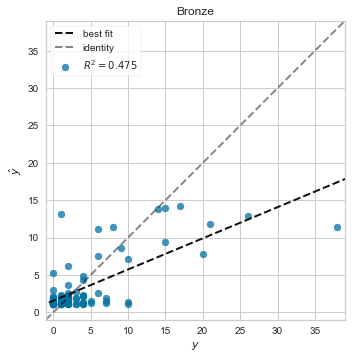

<AxesSubplot:title={'center':'Bronze'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [12]:
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(svm_gold, title = 'Gold')
visualizer.fit(X_train,y_train['Gold'])
visualizer.score(X_test,y_test['Gold'])
visualizer.poof()

visualizer = PredictionError(svm_silver, title = 'Silver')
visualizer.fit(X_train,y_train['Silver'])
visualizer.score(X_test,y_test['Silver'])
visualizer.poof()

visualizer = PredictionError(svm_bronze, title = 'Bronze')
visualizer.fit(X_train,y_train['Bronze'])
visualizer.score(X_test,y_test['Bronze'])
visualizer.poof()

In [13]:

print("R2(Gold)    = ", metrics.r2_score(y_test['Gold'],y_pred_Gold))
print("MSE(Gold)   = ", metrics.mean_squared_error(y_test['Gold'],y_pred_Gold))
print("MAE(Gold)   = ", metrics.mean_absolute_error(y_test['Gold'],y_pred_Gold))
print()


print("R2(Silver)  = ", metrics.r2_score(y_test['Silver'],y_pred_Silver))
print("MSE(Silver) = ", metrics.mean_squared_error(y_test['Silver'],y_pred_Silver))
print("MAE(Silver) = ", metrics.mean_absolute_error(y_test['Silver'],y_pred_Silver))
print()


print("R2(Bronze)  = ", metrics.r2_score(y_test['Bronze'],y_pred_Bronze))
print("MSE(Bronze) = ", metrics.mean_squared_error(y_test['Bronze'],y_pred_Bronze))
print("MAE(Bronze) = ", metrics.mean_absolute_error(y_test['Bronze'],y_pred_Bronze))

R2(Gold)    =  0.3624613348380864
MSE(Gold)   =  30.583333333333332
MAE(Gold)   =  2.5357142857142856

R2(Silver)  =  0.38985053161436123
MSE(Silver) =  20.202380952380953
MAE(Silver) =  2.488095238095238

R2(Bronze)  =  0.44155173685375027
MSE(Bronze) =  22.535714285714285
MAE(Bronze) =  2.5833333333333335


In [14]:
# Evaluate the model's training score and test score
print("RF training score(Gold) = {:.2f}".format(svm_gold.score(X_train, y_train['Gold'])))
print("RF test score(Gold)     = {:.2f}".format(svm_gold.score(X_test, y_test['Gold'])))
print()

print("RF training score(Silver) = {:.2f}".format(svm_gold.score(X_train, y_train['Silver'])))
print("RF test score(Silver)     = {:.2f}".format(svm_gold.score(X_test, y_test['Silver'])))
print()

print("RF training score(Bronze) = {:.2f}".format(svm_gold.score(X_train, y_train['Bronze'])))
print("RF test score(Bronze)     = {:.2f}".format(svm_gold.score(X_test, y_test['Bronze'])))

RF training score(Gold) = 0.27
RF test score(Gold)     = 0.39

RF training score(Silver) = 0.31
RF test score(Silver)     = 0.41

RF training score(Bronze) = 0.29
RF test score(Bronze)     = 0.38


In [ ]:
param = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}


grid = GridSearchCV(estimator = svm_gold, param_grid = param, cv = 3, verbose = 2)
grid.fit(X_train,y_train['Gold'])

print("Best Accuracy:",grid.best_score_)
print("Best Parameters:",grid.best_params_)


In [ ]:
param = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
 
grid = GridSearchCV(estimator = svm_gold, param_grid = param, cv = 3, verbose = 2)
grid.fit(X_train,y_train['Gold'])

print("Best Accuracy:",grid.best_score_)
print("Best Parameters:",grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
gamma{‘scale’, ‘auto’}

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’},

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = grid_search.GridSearchCV(svr, parameters)

parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [ ]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}

clf = GridSearchCV(rf_gold, parameters)
clf.fit(X_train, y_train)

print("Best Accuracy:",grid.best_score_)
print("Best Parameters:",grid.best_params_)

In [ ]:
#feature importance


feature_importance = np.array(rf_gold.feature_importances_)
feature_names = np.array(X_train.columns)
feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)
print(feat_imp_sorted)

In [ ]:
feature_importance = np.array(rf_silver.feature_importances_)
feature_names = np.array(X_train.columns)
feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)
print(feat_imp_sorted)

In [ ]:
feature_importance = np.array(rf_bronze.feature_importances_)
feature_names = np.array(X_train.columns)
feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)
print(feat_imp_sorted)